In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


**Importing the dataset**

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df=df.drop(columns=["User ID","Gender"])

In [4]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
x=df.drop(columns=["Purchased"])
y=df.Purchased
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

**Feature Scaling**

In [8]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(RandomForestClassifier(random_state=0),{"n_estimators":[3,4,5,6,8,10,20,30,40,50]},cv=10)

In [11]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'n_estimators': [3, 4, 5, 6, 8, 10, 20, 30, 40, 50]})

In [12]:
grid.cv_results_

{'mean_fit_time': array([0.00290053, 0.        , 0.00312543, 0.00692663, 0.00794625,
        0.01000161, 0.01896563, 0.02939126, 0.03882158, 0.04657228]),
 'std_fit_time': array([1.57825347e-03, 0.00000000e+00, 6.25085831e-03, 5.00704864e-03,
        4.77051210e-04, 2.21048870e-06, 3.18941672e-04, 1.14336039e-03,
        8.11980186e-04, 3.37544489e-03]),
 'mean_score_time': array([0.00040007, 0.0062552 , 0.00156274, 0.00159636, 0.00080128,
        0.00100086, 0.00170023, 0.00210223, 0.00324464, 0.00310111]),
 'std_score_time': array([4.89979393e-04, 7.66103291e-03, 4.68821526e-03, 3.48707922e-03,
        4.00644000e-04, 2.40424775e-06, 4.58042426e-04, 2.97695479e-04,
        4.96254902e-04, 1.13663290e-03]),
 'param_n_estimators': masked_array(data=[3, 4, 5, 6, 8, 10, 20, 30, 40, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 3},
  {'n_es

In [13]:
grid.best_score_

0.8892857142857142

In [14]:
grid.best_params_

{'n_estimators': 50}

In [16]:
model = RandomForestClassifier(random_state=0,n_estimators=50)

In [17]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

**Predicting the Test set results**

In [18]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [19]:
model.score(X_test, y_test)

0.925

**Making the Confusion Matrix**

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
train_y_pred = model.predict(X_train)
am = confusion_matrix(y_train, train_y_pred)
print(cm)
print(am)

[[71  7]
 [ 2 40]]
[[178   1]
 [  1 100]]


**Visualising the Training set results**

Text(58.222222222222214, 0.5, 'Truth')

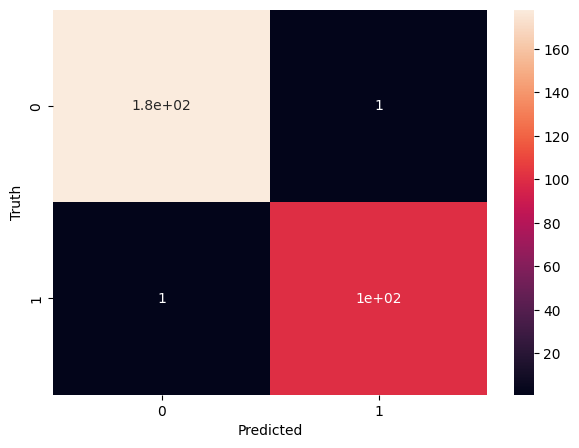

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(am, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Visualising the Test set results**

Text(58.222222222222214, 0.5, 'Truth')

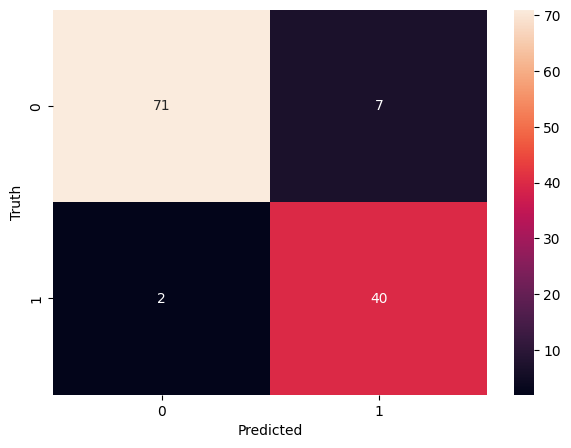

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')